## **Task 1**

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
!wget = 'https://courses.openedu.ru/assets/courseware/v1/e3f5f84d16ad7257f1f2ecf3aebf8e67/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/audi-798530_1280.jpg'

--2024-01-22 18:52:52--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2024-01-22 18:52:52--  https://courses.openedu.ru/assets/courseware/v1/e3f5f84d16ad7257f1f2ecf3aebf8e67/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/audi-798530_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 531379 (519K) [image/jpeg]
Saving to: ‘audi-798530_1280.jpg.1’

audi-798530_1280.jp 100%[===================>] 518.92K   837KB/s    in 0.6s    

2024-01-22 18:52:54 (837 KB/s) - ‘audi-798530_1280.jpg.1’ saved [531379/531379]

FINISHED --2024-01-22 18:52:54--
Total wall clock time: 1.6s
Downloaded: 1 files, 519K in 0.6s (837 KB/s)


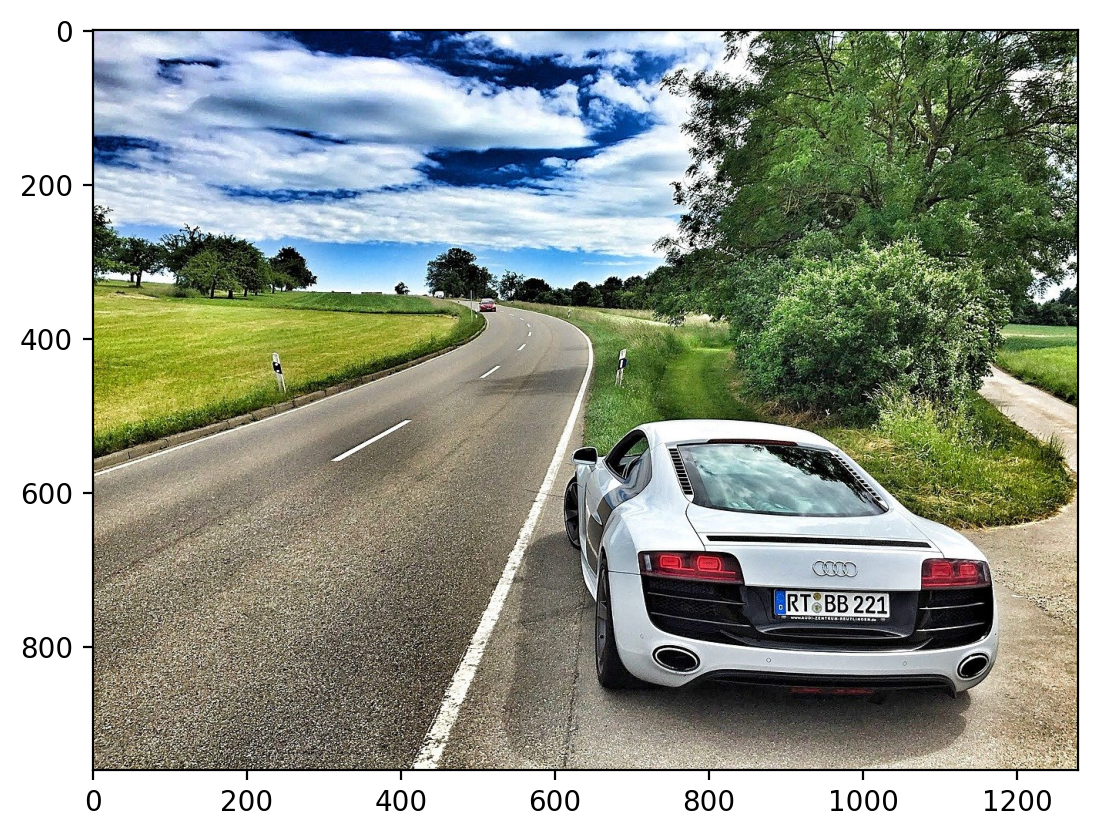

In [37]:
file_name = 'audi-798530_1280.jpg'
img = cv2.imread(file_name)
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)

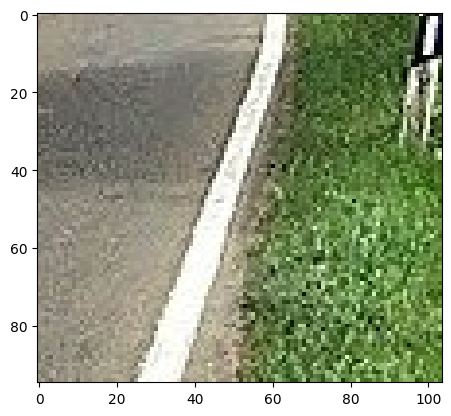

In [4]:
cropped_img = img[427:522, 585:689]
cropped_img_RGB = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_img_RGB)

In [5]:
height, width, channels = cropped_img_RGB.shape
print(f'Height: {height}\nWidth: {width}\nChannels: {channels}')

Height: 95
Width: 104
Channels: 3


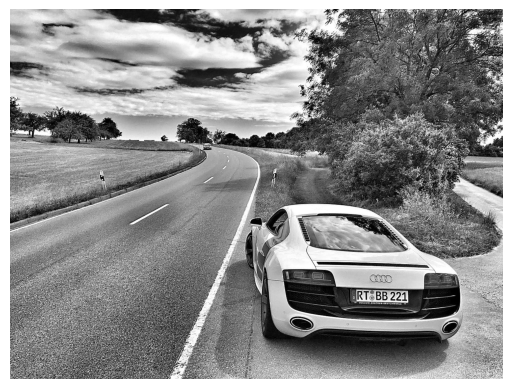

In [6]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cropped_img_gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(gray_img, cmap = 'gray')

In [7]:
#the key points were found using sift.detectAndCompute(img).
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray_img, None)
crop_kp, crop_des = sift.detectAndCompute(cropped_img_gray, None)

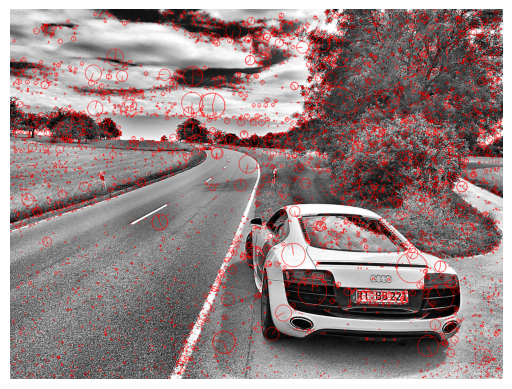

In [8]:
img_kp = cv2.drawKeypoints(gray_img, kp, np.array([]), [255, 0, 0], cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.axis('off')
plt.imshow(img_kp)

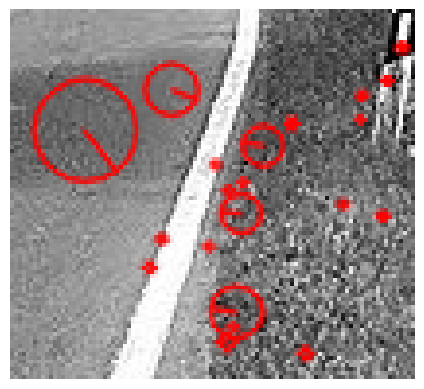

In [9]:
cropped_img_kp = cv2.drawKeypoints(cropped_img_gray, crop_kp, np.array([]), [255, 0, 0], cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.axis('off')
plt.imshow(cropped_img_kp)

In [10]:
#Compare the control points and the corresponding descriptors of one image with another
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = True)
#CrossCheck=false - one-to-many matches, crossCheck=true - one-to-one matches
matches = bf.match(des, crop_des)
#Sort the matches from best to worst depending on the distance attribute
matches = sorted(matches, key = lambda x: x.distance)
print(f'Number of matches: {len(matches)}')

Number of matches: 25


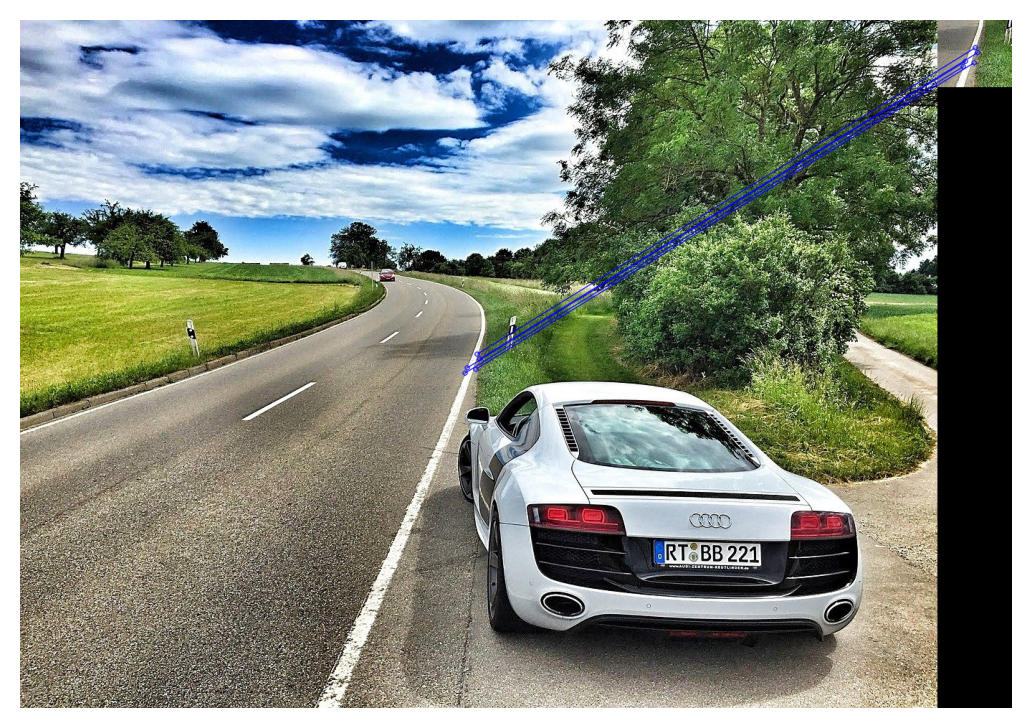

In [11]:
matching_result = cv2.drawMatches(img, kp, cropped_img, crop_kp, matches[:5], None, [255, 0, 0], flags = 2)
mpl.rcParams['figure.dpi'] = 200
plt.axis('off')
plt.imshow(cv2.cvtColor(matching_result, cv2.COLOR_BGR2RGB))
plt.show()

In [43]:
img_r = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
x, y = kp[matches[0].queryIdx].pt
print(f'x: {x:.0f} y: {y:.0f}')
b, g, r = img[int(np.round(y))][int(np.round(x))]
print(f"Intensity of channels B, G, R: {b}, {g}, {r}")

x: 620 y: 493
Intensity of channels B, G, R: 131, 150, 155
